In this example, we are going to address how to do data scraping, data wrangling, data analytics and advaced plotting. 

We are going to use pandas to do data wrangling and manipulation of the input dataset.  Finally, we are going to do basic data analytics with pandas, followed by data visualization using matplotlib and seaborn.


In [1]:
%matplotlib inline

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In order to do data analytics, we need data. So the first thing to do is get the data from somewhere. Hereafter we are going to work with NBA players data. In the NBA site stats.nba.com you will find all the statistics for every single player. Let us get the stat for Lebron James,

In [4]:
#Lebron James data
#PlayerID is the number in the nba.stats site

shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID=2544&Plu'\
                'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                'owZones=0'  

Have in mind that the previous url corresponds to Lebron James shot chart data. If you want to access different data, another player or the data for a specifc team, you will need to find the right link.

Now let's use the module requests to get the server data from shot_chart_url. 

In [6]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)

Now that we have the data let us manipulate it and grab some information from it.

In [8]:
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']

In [10]:
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

Now we can create a pandas DataFrame using the scraped shot chart data.


In [11]:
shot_df = pd.DataFrame(data=shots, columns=headers)

To print a concise summary of the `DataFrame`,

In [48]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1278
Data columns (total 21 columns):
GRID_TYPE              1279 non-null object
GAME_ID                1279 non-null object
GAME_EVENT_ID          1279 non-null int64
PLAYER_ID              1279 non-null int64
PLAYER_NAME            1279 non-null object
TEAM_ID                1279 non-null int64
TEAM_NAME              1279 non-null object
PERIOD                 1279 non-null int64
MINUTES_REMAINING      1279 non-null int64
SECONDS_REMAINING      1279 non-null int64
EVENT_TYPE             1279 non-null object
ACTION_TYPE            1279 non-null object
SHOT_TYPE              1279 non-null object
SHOT_ZONE_BASIC        1279 non-null object
SHOT_ZONE_AREA         1279 non-null object
SHOT_ZONE_RANGE        1279 non-null object
SHOT_DISTANCE          1279 non-null int64
LOC_X                  1279 non-null int64
LOC_Y                  1279 non-null int64
SHOT_ATTEMPTED_FLAG    1279 non-null int64
SHOT_MADE_FLAG         

To generate a summary statistics of a `DataFrame`.

In [23]:
shot_df.describe()

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,1279.000000,1279,1279,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279,1279.000000
mean,250.136044,2544,1610612739,2.448006,5.295543,28.170446,12.136826,-13.997654,83.936669,1,0.487881
std,156.436191,0,0,1.137046,3.566744,17.278734,10.302508,104.266921,91.996852,0,0.500049
min,2.000000,2544,1610612739,1.000000,0.000000,0.000000,0.000000,-245.000000,-30.000000,1,0.000000
25%,116.000000,2544,1610612739,1.000000,2.000000,13.000000,1.000000,-94.000000,4.000000,1,0.000000
50%,254.000000,2544,1610612739,2.000000,5.000000,29.000000,12.000000,-2.000000,42.000000,1,0.000000
75%,379.000000,2544,1610612739,3.000000,8.000000,42.000000,23.000000,22.000000,164.000000,1,1.000000
max,628.000000,2544,1610612739,5.000000,11.000000,59.000000,46.000000,241.000000,418.000000,1,1.000000


At this point, let us plot a shot chart.  A short chart is nothing else than a scatter plot of all fields attempts of the player (Lebron James in this case).  All this information is contained in the data gathered from the nba site. Let us manipulate the pandas dataframe to get an smaller and easy to use dataframe.

In [49]:
new_df = pd.DataFrame()

In [51]:
new_df['LOC_X'] = shot_df.LOC_X
new_df['LOC_Y'] = shot_df['LOC_Y']
new_df['SHOT_MADE_FLAG'] = shot_df['SHOT_MADE_FLAG']
new_df['SHOT_TYPE'] = shot_df['SHOT_TYPE']

converted = shot_df[shot_df.SHOT_MADE_FLAG == 1]
missed = shot_df[shot_df.SHOT_MADE_FLAG == 0]

three_pointer = new_df[new_df.SHOT_TYPE == '3PT Field Goal']
two_pointer = new_df[new_df.SHOT_TYPE == '2PT Field Goal']

At this point, let's do some basic plotting using matplotlib.  The first plot will be the shot chart of converted and missed shots using the `DataFrames` we just created.

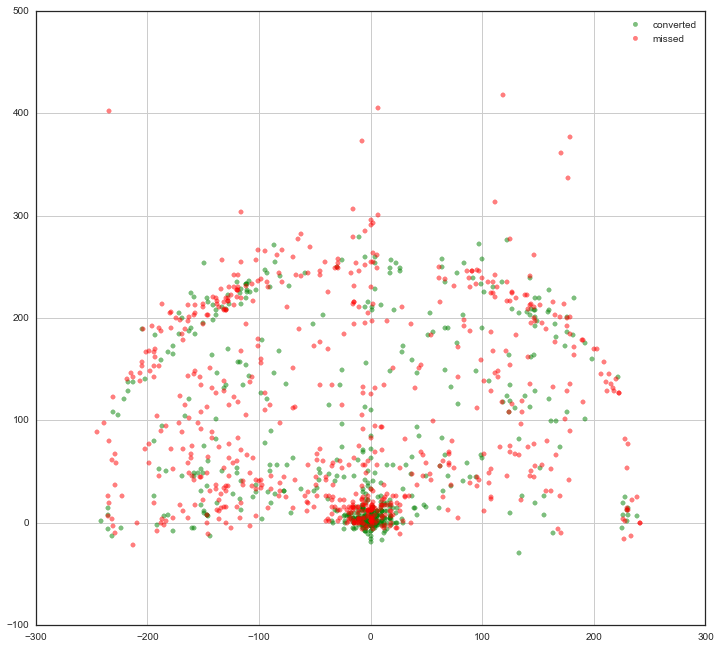

In [66]:
sns.set_style("white")
sns.set_color_codes()

plt.figure(figsize=(12,11))

plt.scatter(converted.LOC_X, converted.LOC_Y, color='green',label='converted',s=20,marker='o',alpha=0.5)
plt.scatter(missed.LOC_X, missed.LOC_Y, color='red',label='missed',s=20,marker='o',alpha=0.5)

plt.legend()
plt.grid()

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.show()

We can also plot all the 3 point shots by converted and missed groups, as follows,

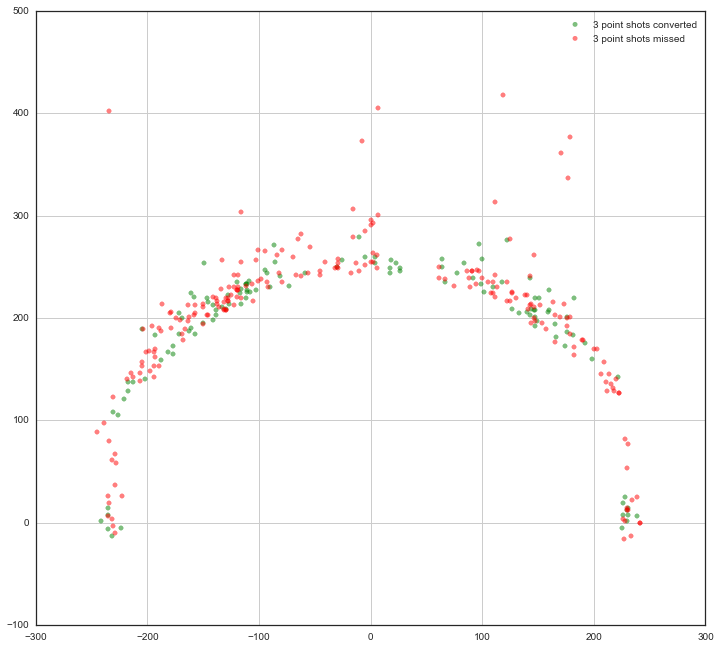

In [67]:
sns.set_style("white")
sns.set_color_codes()

plt.figure(figsize=(12,11))

plt.scatter(three_pointer.LOC_X[three_pointer.SHOT_MADE_FLAG == 1], three_pointer.LOC_Y[three_pointer.SHOT_MADE_FLAG == 1], color='green',label='3 point shots converted',s=20,marker='o',alpha=0.5)
plt.scatter(three_pointer.LOC_X[three_pointer.SHOT_MADE_FLAG == 0], three_pointer.LOC_Y[three_pointer.SHOT_MADE_FLAG == 0], color='red',label='3 point shots missed',s=20,marker='o',alpha=0.5)

plt.legend()
plt.grid()

plt.xlim(-300,300)
plt.ylim(-100,500)
#plt.grid()
plt.show()

We can use more complex plots. Let's do a scatter plot with histograms (joint plot).

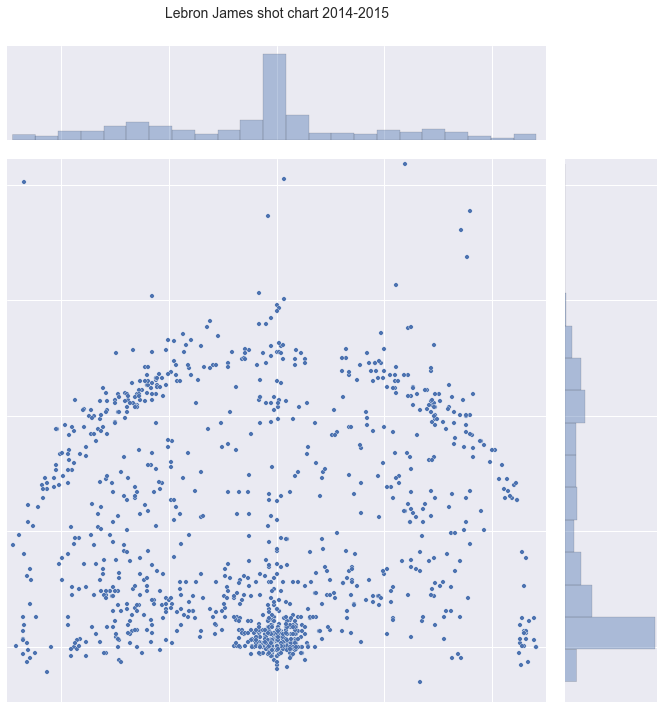

In [62]:
# create our jointplot
#sns.set(color_codes=True)
#sns.set_style("white")
sns.set(style="darkgrid")

joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter',space=0.2, alpha=1, 
                                 size=8, edgecolor='w', color='b').set_axis_labels("x location", "y location")

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to adjust
joint_shot_chart.fig.set_size_inches(10,10)
ax = joint_shot_chart.ax_joint

# Adjust the axis limits and orientation of the plot in order
ax.set_xlim(-250,250)
#ax.set_ylim(422.5, -47.5)
ax.set_ylim(-47.5, 422.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James shot chart 2014-2015', 
             y=1.25, fontsize=14)

plt.show()

Looking at this plot and thanks to the histogram, we can easily identify from where the player is taking more shots.

Instead of using a scatter plot, we can use hexbins. Hexbin are bivariate histograms and for this kind of data visualization they are very useful, as the show from where Lebron James is taking shots and the frequency of the field attemps.

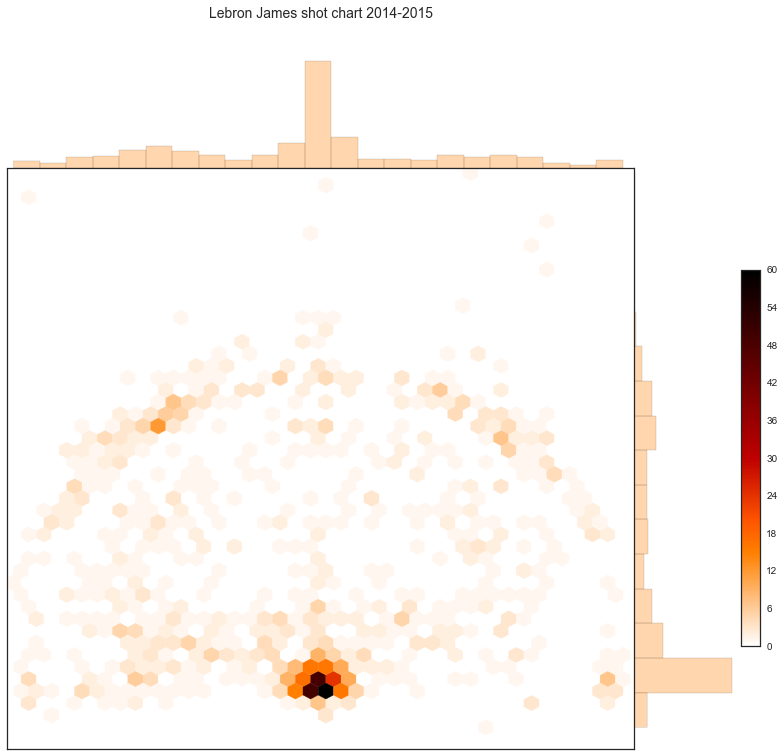

In [64]:
# create our jointplot
sns.set_style("white")

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex',gridsize=40,space=0, color=cmap(0.2), cmap=cmap,vmin=0, vmax=60)

#joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
#                                 kind='hex',space=0, color=cmap(0.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to adjust
ax = joint_shot_chart.ax_joint

# Adjust the axis limits and orientation of the plot in order
ax.set_xlim(-250,250)
#ax.set_ylim(422.5, -47.5)
ax.set_ylim(-47.5, 422.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James shot chart 2014-2015', 
             y=1.25, fontsize=14)

plt.colorbar()
plt.show()

In the previous plot we showed all the field attempts, but can easily plot converted shots and missed shots.

At the point let's do some pretty plotting.  We are going to add a background to the scatter plot and we are going to plot only the 2 point shots attempted,

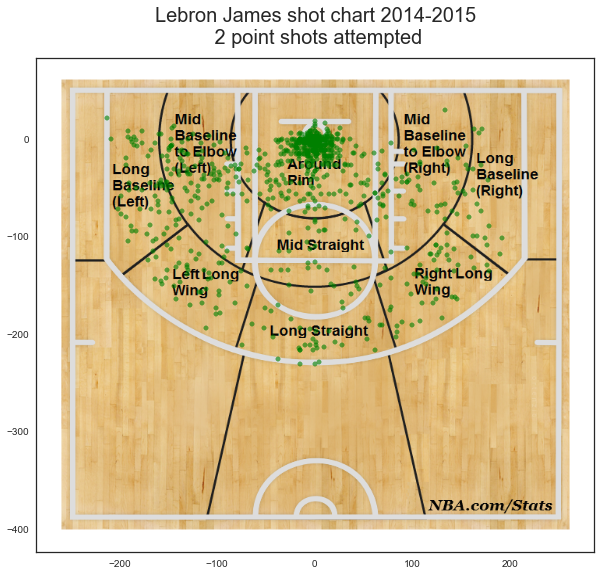

In [45]:
from scipy.misc import imread

plt.figure(figsize=(10,10))

datafile = 'chart1.png'
img = imread(datafile)
plt.imshow(img, zorder=0, extent=[-260, 260, -400, 60])

plt.scatter(two_pointer.LOC_X,-1*two_pointer.LOC_Y,zorder=1,color='green',label='2 point shots attempted',s=20,marker='o',alpha=0.6)

plt.title('Lebron James shot chart 2014-2015 \n 2 point shots attempted', y = 1.02, fontsize=20)

#plt.ylim(400, -60)
plt.show()